# Задание
Основные цели этого задания:

- попрактиковаться в анализе временных рядов,

- научиться извлекать дополнительные признаки для прогнозирования временного ряда,

- проверять качество модели на отложенной выборке.

Задача: спрогнозировать число пассажиров авиакомпании помесячно.

**План:**

1. Загрузите данные из источника по ссылке, ознакомьтесь с ними и подготовьте к аналитике

        a. Найдите и удалите пропуски, если они есть.

        b. Поменяйте тип столбца с временными отсечками в datetime.

        c. Установите индексом данных столбец с временными отсечками и убедитесь, что он монотонно возрастает.

2. Проанализируйте временной ряд

        a. Оставьте для аналитики лишь с 1952 по 1957 год (включительно).

        b. Реализуйте разложение на компоненты тренда и сезонности. Визуализируйте результат разложения и сделайте выводы.

            1. Есть ли тренд?

            2. Есть ли сезонность и какая она (ежемесячная/ежеквартальная/ежегодная и т.д.)?

            3. Является ли ряд стационарным и почему?

        c. Постройте график, чтобы оценить автокорреляцию и сделайте выводы

            1. У какого сдвига самая высокая автокорреляция?

            2. Подтверждаются ли выводы о наличии тренда графиком автокорреляции?

3. Подготовьте данные к обучению линейной модели

        a. Напишите функцию, которая будет генерировать новые признаки (календарные признаки, несколько колонок с разными сдвигами, несколько колонок с разными скользящими средними)

            1. Воспользуйтесь наработками из скринкастов.

            2. Добавьте аргумент, который будет отвечать за возможные сдвиги. Это должен быть список, по которому в цикле будет добавляться новая колонка lag_n, где n — число из этого списка, отвечающее за сдвиг.

            3. Добавьте аргумент, который будет отвечать за возможные размеры скользящего среднего. Это должен быть список, по которому в цикле будет добавляться новая колонка rolling_mean_m, где m — число из этого списка, отвечающее за размер окна, по которому вычисляется среднее. Не забудьте, что скользящее среднее нужно сдвигать, чтобы не было «заглядывания в будущее».

        b. Рассчитайте новые признаки с помощью реализованной функции, подав ей на вход произвольные параметры генерации новых признаков.

        c. Удалите наблюдения с пропусками в новых переменных.

        d. Разделите данные на признаки и целевую переменную.

        e. Разделите данные на обучающую и валидационную части. Не забудьте, что валидационная часть должна идти строго после обучающей.

4. Обучите линейную модель машинного обучения и оцените ее качество

        a. Обучите линейную модель на обучающей части данных.

        b. Рассчитайте значение метрики качества MAE на обучающей и валидационных частях. Если модель работает плохо (метрика выше 20), попробуйте выделить другой набор признаков, вызывая свою функцию с новыми параметрами.

        c. Визуализируйте реальный временной ряд и прогнозные значения.

5. Оцените качество модели на отложенной выборке. В качестве отложенной выборки у нас будут наблюдения с 1958 по 1960 год

        a. Возьмите из источника необходимый срез данных.

        b. Подготовьте данные к прогнозированию.

            1. Добавьте признаки с помощью реализованной ранее функции.

            2. Удалите наблюдения с пропусками.

            3. Если после удаления у вас осталось менее 36 наблюдений, откорректируйте срез из пункта 5.а.

            4. Отделите целевую переменную от признаков.

        c. Постройте прогноз с помощью обученной ранее линейной модели.

        d. Рассчитайте значение метрики качества на отложенной выборке.

        e. Визуализируйте реальный временной ряд и прогнозные значения.

6. Значение метрики MAE на отложенной выборке должно быть не более 35.

**Кратко о данных:**
Количество авиапассажиров в месяц. Набор данных семинара

<div class="alert alert-info">

1. Загрузите данные из источника по ссылке, ознакомьтесь с ними и подготовьте к аналитике
    
> a. Найдите и удалите пропуски, если они есть.

> b. Поменяйте тип столбца с временными отсечками в datetime.
 
> c. Установите индексом данных столбец с временными отсечками и убедитесь, что он монотонно возрастает.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels import api as sm
from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('AirPassengers.csv')

In [3]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
Month,1949-01,1949-02,1949-03,1949-04,1949-05,1949-06,1949-07,1949-08,1949-09,1949-10,...,1960-03,1960-04,1960-05,1960-06,1960-07,1960-08,1960-09,1960-10,1960-11,1960-12
#Passengers,112,118,132,129,121,135,148,148,136,119,...,419,461,472,535,622,606,508,461,390,432


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


<div class="alert alert-info">
Датасет представляет собой информацию о количетсве пассажиров во время полетов самолета за каждый месяц с 1949 по 1960 года

<div class="alert alert-success">
Никаких пропусков не обнаружено

In [6]:
# b. Поменяйте тип столбца с временными отсечками в datetime
df['Month'] = df['Month'].astype('datetime64[ns]')

In [7]:
df.rename(columns={'#Passengers': 'Passengers'}, inplace=True) # Изменим имя для простоты обращения

In [8]:
df

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [9]:
# c. Установите индексом данных столбец с временными отсечками и убедитесь, что он монотонно возрастает.
df.set_index('Month', inplace=True)

**Чтобы проверить, в хронологическом ли порядке расположены даты, посмотрим атрибут индекса таблицы is_monotonic_increasing. Если порядок соблюдён, атрибут вернёт True, если нет — False.**

In [10]:
df.index.is_monotonic_increasing

True

<div class="alert alert-success">
Данные наши идут в хронологичесоком порядке

<div class="alert alert-info">

2. Проанализируйте временной ряд

        a. Оставьте для аналитики лишь с 1952 по 1957 год (включительно).

        b. Реализуйте разложение на компоненты тренда и сезонности. Визуализируйте результат разложения и сделайте выводы.

            1. Есть ли тренд?

            2. Есть ли сезонность и какая она (ежемесячная/ежеквартальная/ежегодная и т.д.)?

            3. Является ли ряд стационарным и почему?

        c. Постройте график, чтобы оценить автокорреляцию и сделайте выводы

            1. У какого сдвига самая высокая автокорреляция?

            2. Подтверждаются ли выводы о наличии тренда графиком автокорреляции?


In [11]:
# a. Оставьте для аналитики лишь с 1952 по 1957 год (включительно).
df1 = df['1952':'1957']
print(df1.index.min(), df1.index.max())

1952-01-01 00:00:00 1957-12-01 00:00:00


<div class="alert alert-info">
    
b. Реализуйте разложение на компоненты тренда и сезонности. Визуализируйте результат разложения и сделайте выводы.

> 1. Есть ли тренд?

> 2. Есть ли сезонность и какая она (ежемесячная/ежеквартальная/ежегодная и т.д.)?

> 3. Является ли ряд стационарным и почему?

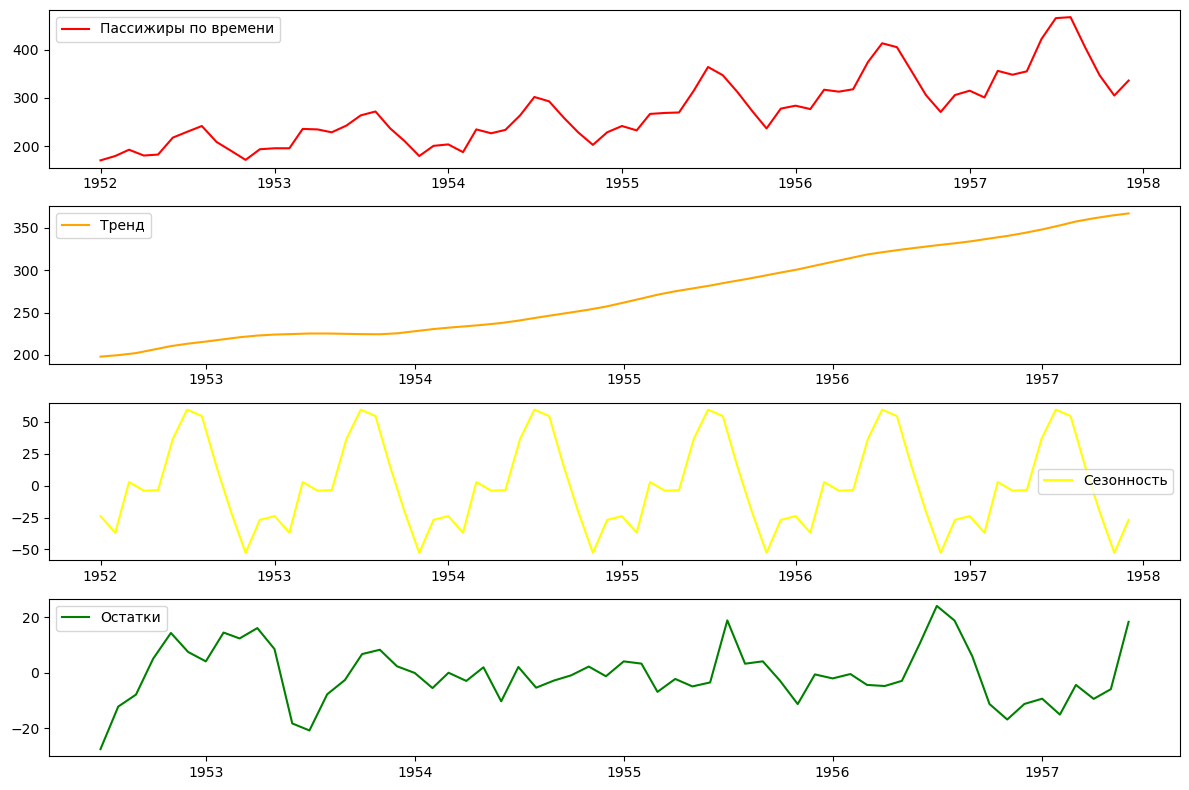

In [12]:
# Декомпозиция временного ряда
decomposition = seasonal_decompose(df1['Passengers'], model='additive')

# Получение тренда, сезонности и остатков
trend = decomposition.trend
seasonality = decomposition.seasonal
residuals = decomposition.resid

# Визуализация тренда, сезонности и остатков
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df1['Passengers'], color='red', label='Пассижиры по времени')
plt.legend(loc='best')
plt.subplot(4, 1, 2)
plt.plot(trend, color='orange', label='Тренд')
plt.legend(loc='best')
plt.subplot(4, 1, 3)
plt.plot(seasonality, color='yellow', label='Сезонность')
plt.legend(loc='best')
plt.subplot(4, 1, 4)
plt.plot(residuals, color='green', label='Остатки')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<div class="alert alert-success">
    1. Есть ли тренд?
    
**Да, есть. Так как мы видим, что с годами количество пассажиров монотонно растет**

<div class="alert alert-success">
    2. Есть ли сезонность и какая она (ежемесячная/ежеквартальная/ежегодная и т.д.)?

**Сезонность есть и она ежегодная**

In [13]:
# Cреднее
data_quart_mean = df1.resample('1Q').mean()
data_quart_mean.rename(columns={'Passengers': 'Passengers_mean'}, inplace=True)
data_quart_mean.head()

,Passengers_mean
Month,
1952-03-31,181.333333
1952-06-30,194.000000
1952-09-30,227.000000
1952-12-31,185.666667
1953-03-31,209.333333


In [14]:
# Дисперсия
data_quart_var = df1.resample('1Q').var()
data_quart_var.rename(columns={'Passengers': 'Passengers_var'}, inplace=True)
data_quart_var.head()

,Passengers_var
Month,
1952-03-31,122.333333
1952-06-30,433.000000
1952-09-30,279.000000
1952-12-31,142.333333
1953-03-31,533.333333


<div class="alert alert-warning">
    3. Является ли ряд стационарным и почему?
    
**Ряд не является стационарным. Стационарность ряда означает, что его свойства, такие как среднее значение и дисперсия, не меняются со временем. Если ряд является стационарным, это означает, что его статистические свойства не зависят от времени и можно применять статистические методы для анализа такого ряда.**

<div class="alert alert-info">

3. Подготовьте данные к обучению линейной модели

        a. Напишите функцию, которая будет генерировать новые признаки (календарные признаки, несколько колонок с разными сдвигами, несколько колонок с разными скользящими средними)

            1. Воспользуйтесь наработками из скринкастов.

            2. Добавьте аргумент, который будет отвечать за возможные сдвиги. Это должен быть список, по которому в цикле будет добавляться новая колонка lag_n, где n — число из этого списка, отвечающее за сдвиг.

            3. Добавьте аргумент, который будет отвечать за возможные размеры скользящего среднего. Это должен быть список, по которому в цикле будет добавляться новая колонка rolling_mean_m, где m — число из этого списка, отвечающее за размер окна, по которому вычисляется среднее. Не забудьте, что скользящее среднее нужно сдвигать, чтобы не было «заглядывания в будущее».

        b. Рассчитайте новые признаки с помощью реализованной функции, подав ей на вход произвольные параметры генерации новых признаков.

        c. Удалите наблюдения с пропусками в новых переменных.

        d. Разделите данные на признаки и целевую переменную.

        e. Разделите данные на обучающую и валидационную части. Не забудьте, что валидационная часть должна идти строго после обучающей.

In [15]:
def generate_features(data, max_lag, rolling_mean_size):
    # Создание календарных признаков
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['quarter'] = data.index.quarter
    
     # Создание признаков со сдвигами
    for i in range(1, max_lag + 1):
        data[f'lag_{i}'] = data['Passengers'].shift(i)
    
    # Создание признаков со скользящими средними
    data['rolling_mean'] = data['Passengers'].rolling(rolling_mean_size).mean()
    
    for i in range(1, max_lag + 1):
        data[f'rolling_mean_{i}'] = data['Passengers'].shift(i)
    
    return data

In [16]:
# b. Теперь вы можете вызвать функцию generate_features() с произвольными параметрами для генерации новых признаков:

data = generate_features(df1[['Passengers']].copy(), 3, 3)

In [17]:
# c. Если после создания новых признаков в данных появляются пропущенные значения, вы можете удалить наблюдения, содержащие пропуски:
data = data.dropna()

In [18]:
data

,Passengers,year,month,quarter,lag_1,lag_2,lag_3,rolling_mean,rolling_mean_1,rolling_mean_2,rolling_mean_3
Month,,,,,,,,,,,
1952-04-01,181,1952,4,2,193.0,180.0,171.0,184.666667,193.0,180.0,171.0
1952-05-01,183,1952,5,2,181.0,193.0,180.0,185.666667,181.0,193.0,180.0
1952-06-01,218,1952,6,2,183.0,181.0,193.0,194.000000,183.0,181.0,193.0
1952-07-01,230,1952,7,3,218.0,183.0,181.0,210.333333,218.0,183.0,181.0
1952-08-01,242,1952,8,3,230.0,218.0,183.0,230.000000,230.0,218.0,183.0
...,...,...,...,...,...,...,...,...,...,...,...
1957-08-01,467,1957,8,3,465.0,422.0,355.0,451.333333,465.0,422.0,355.0
1957-09-01,404,1957,9,3,467.0,465.0,422.0,445.333333,467.0,465.0,422.0
1957-10-01,347,1957,10,4,404.0,467.0,465.0,406.000000,404.0,467.0,465.0


In [19]:
# d. Разделите данные на признаки и целевую переменную:
X = data.drop('Passengers', axis=1)
y = data['Passengers']

In [20]:
# e. Наконец, разделите данные на обучающую и валидационную части. Обратите внимание, что валидационная часть должна идти строго после обучающей, чтобы избежать "заглядывания в будущее":

# Примерное соотношение: 80% обучающая выборка, 20% валидационная выборка
train, test = train_test_split(data.dropna(), shuffle=False, test_size=0.2)
train = train.dropna()

y_train = train['Passengers']
X_train = train.drop(['Passengers'], axis=1)
y_test = test['Passengers']
X_test = test.drop(['Passengers'], axis=1)

<div class="alert alert-info">

4. Обучите линейную модель машинного обучения и оцените ее качество

        a. Обучите линейную модель на обучающей части данных.

        b. Рассчитайте значение метрики качества MAE на обучающей и валидационных частях. Если модель работает плохо (метрика выше 20), попробуйте выделить другой набор признаков, вызывая свою функцию с новыми параметрами.

        c. Визуализируйте реальный временной ряд и прогнозные значения.

In [21]:
# a. Обучите линейную модель на обучающей части данных.
model = LinearRegression()
model.fit(X_train, y_train)

train_predict = pd.Series(model.predict(X_train))
train_predict.index = X_train.index

test_predict = pd.Series(model.predict(X_test))
test_predict.index = X_test.index

# b. Рассчитайте значение метрики качества MAE на обучающей и валидационных частях.
print(f"MAE обучающей выборки: {mean_absolute_error(y_train, train_predict)}")
print(f"MAE тестовой выборки: {mean_absolute_error(y_test, test_predict)}")

MAE обучающей выборки: 1.446923389184204e-13
MAE тестовой выборки: 1.0556634931292917e-13


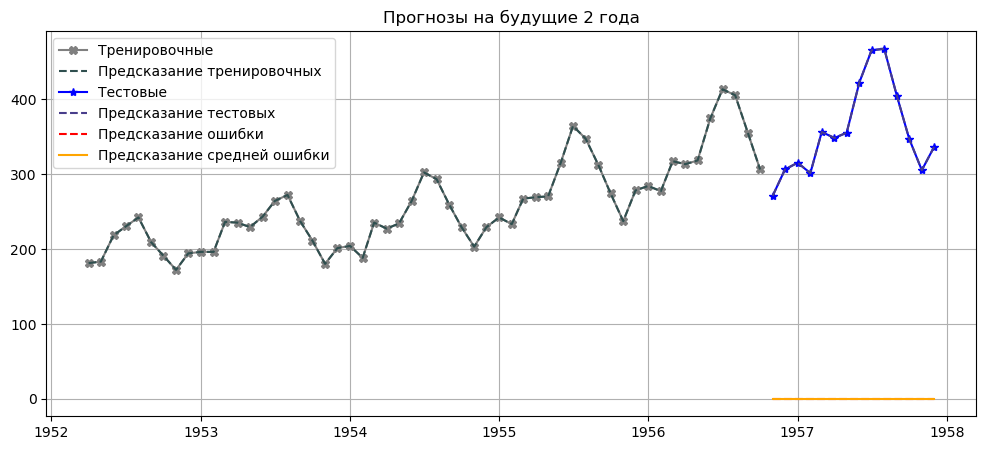

In [22]:
# c. Визуализируйте реальный временной ряд и прогнозные значения.
fig, ax = plt.subplots(1, 1, figsize=[12, 5])

error = abs(test['Passengers'] - test_predict)
error_mean = pd.Series([error.mean()] * error.shape[0])
error_mean.index = test.index

plt.title("Прогнозы на будущие 2 года")
ax.plot(y_train, c='grey', marker='X', label='Тренировочные')
ax.plot(train_predict, c='darkslategrey', label='Предсказание тренировочных', linestyle='--')
ax.plot(y_test, c='blue', marker='*',  label='Тестовые')
ax.plot(test_predict, c='darkslateblue', label='Предсказание тестовых', linestyle='--')
ax.plot(error, c='red', label='Предсказание ошибки', linestyle='--')
ax.plot(error_mean, c='orange', label='Предсказание средней ошибки')
ax.grid()
ax.legend(loc='upper left');

<div class="alert alert-success">

**Судя по постороению графика очень близко к правде**

<div class="alert alert-info">

5. Оцените качество модели на отложенной выборке. В качестве отложенной выборки у нас будут наблюдения с 1958 по 1960 год

        a. Возьмите из источника необходимый срез данных.

        b. Подготовьте данные к прогнозированию.

            1. Добавьте признаки с помощью реализованной ранее функции.

            2. Удалите наблюдения с пропусками.

            3. Если после удаления у вас осталось менее 36 наблюдений, откорректируйте срез из пункта 5.а.

            4. Отделите целевую переменную от признаков.

        c. Постройте прогноз с помощью обученной ранее линейной модели.

        d. Рассчитайте значение метрики качества на отложенной выборке.

        e. Визуализируйте реальный временной ряд и прогнозные значения.

In [23]:
# a. Возьмите из источника необходимый срез данных.

df2 = df['1957':]
print(df2.index.min(), df2.index.max())
# (3. Если после удаления у вас осталось менее 36 наблюдений, откорректируйте срез из пункта 5.а.) - было выполнено

1957-01-01 00:00:00 1960-12-01 00:00:00


<div class="alert alert-info">

b. Подготовьте данные к прогнозированию.

> 1. Добавьте признаки с помощью реализованной ранее функции.

> 2. Удалите наблюдения с пропусками.

> 3. Если после удаления у вас осталось менее 36 наблюдений, откорректируйте срез из пункта 5.а.

> 4. Отделите целевую переменную от признаков.

In [24]:
# 1. Добавьте признаки с помощью реализованной ранее функции.
data2 = generate_features(df2[['Passengers']].copy(), 3, 3)

In [25]:
# 2. Удалите наблюдения с пропусками.
data2 = data2.dropna()

In [26]:
data2.head()

,Passengers,year,month,quarter,lag_1,lag_2,lag_3,rolling_mean,rolling_mean_1,rolling_mean_2,rolling_mean_3
Month,,,,,,,,,,,
1957-04-01,348,1957,4,2,356.0,301.0,315.0,335.000000,356.0,301.0,315.0
1957-05-01,355,1957,5,2,348.0,356.0,301.0,353.000000,348.0,356.0,301.0
1957-06-01,422,1957,6,2,355.0,348.0,356.0,375.000000,355.0,348.0,356.0
1957-07-01,465,1957,7,3,422.0,355.0,348.0,414.000000,422.0,355.0,348.0
1957-08-01,467,1957,8,3,465.0,422.0,355.0,451.333333,465.0,422.0,355.0


In [27]:
data2.shape

(45, 11)

In [28]:
# 4. Отделите целевую переменную от признаков
train, test = train_test_split(data2.dropna(), shuffle=False, test_size=0.2)
train = train.dropna()

y_train = train['Passengers']
X_train = train.drop(['Passengers'], axis=1)
y_test = test['Passengers']
X_test = test.drop(['Passengers'], axis=1)

<div class="alert alert-info">

> c. Постройте прогноз с помощью обученной ранее линейной модели.

> d. Рассчитайте значение метрики качества на отложенной выборке.

> e. Визуализируйте реальный временной ряд и прогнозные значения.

In [29]:
# c. Постройте прогноз с помощью обученной ранее линейной модели.
train_predict = pd.Series(model.predict(X_train))
train_predict.index = X_train.index

test_predict = pd.Series(model.predict(X_test))
test_predict.index = X_test.index

In [30]:
# d. Рассчитайте значение метрики качества на отложенной выборке.
print(f"MAE обучающей выборки: {mean_absolute_error(y_train, train_predict)}")
print(f"MAE тестовой выборки: {mean_absolute_error(y_test, test_predict)}")

MAE обучающей выборки: 1.4210854715202004e-13
MAE тестовой выборки: 2.7790115887506143e-13


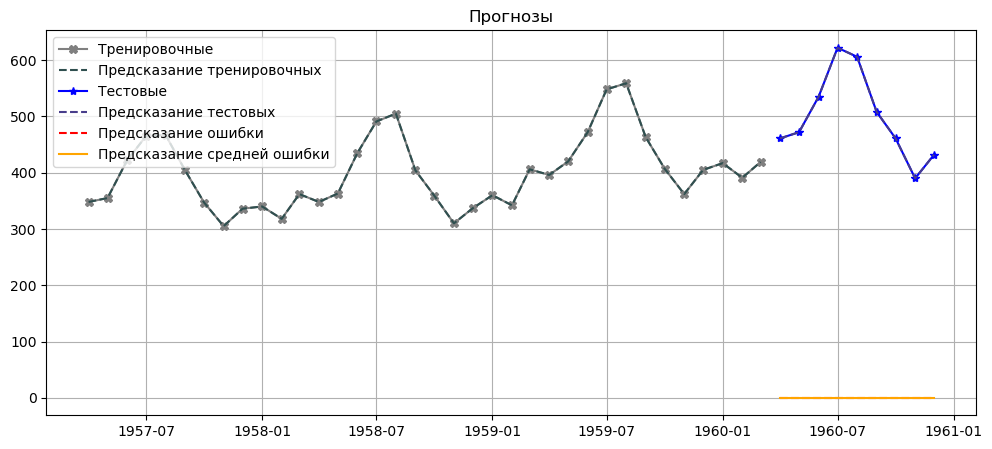

In [31]:
# e. Визуализируйте реальный временной ряд и прогнозные значения.
fig, ax = plt.subplots(1, 1, figsize=[12, 5])

error = abs(test['Passengers'] - test_predict)
error_mean = pd.Series([error.mean()] * error.shape[0])
error_mean.index = test.index

plt.title("Прогнозы")
ax.plot(y_train, c='grey', marker='X', label='Тренировочные')
ax.plot(train_predict, c='darkslategrey', label='Предсказание тренировочных', linestyle='--')
ax.plot(y_test, c='blue', marker='*',  label='Тестовые')
ax.plot(test_predict, c='darkslateblue', label='Предсказание тестовых', linestyle='--')
ax.plot(error, c='red', label='Предсказание ошибки', linestyle='--')
ax.plot(error_mean, c='orange', label='Предсказание средней ошибки')
ax.grid()
ax.legend(loc='upper left');


<div class="alert alert-info">

6. Значение метрики MAE на отложенной выборке должно быть не более 35.

<div class="alert alert-success">

**Последний пункт был успешно соблюдет) Наша модель достаночно неплохо предсказывает значения и редко ошибается**